<a href="https://colab.research.google.com/github/ebernardino01/DataAnalystPortfolio/blob/main/Yellevate/Yellevate_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yellevate Data Analysis Notebook

### Data Dictionary

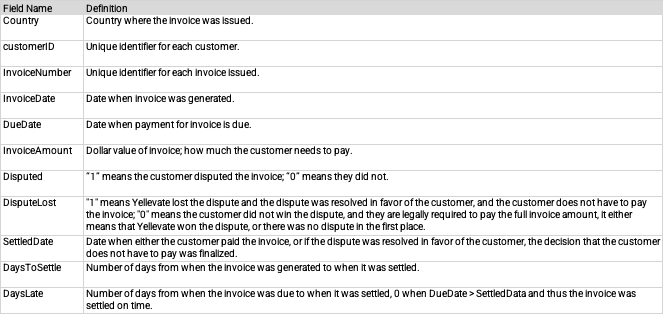

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset

In [2]:
# Read the data from source
df = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1b5H2OngdftEliUeczzBo21agdpe81DRo'
)
df.shape

(2466, 11)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,country,customer_ID,invoice_number,invoice_date,due_date,invoice_amount_usd,disputed,dispute_lost,settled_date,days_to_settle,days_late
0,China,0379-NEVHP,611365,2021-01-02,2021-02-01,5594,0,0,2021-01-15,13,0
1,France,2621-XCLEH,6482427308,2020-01-13,2020-02-12,8099,1,0,2020-03-14,61,31
2,China,2820-XGXSB,9231909,2021-07-03,2021-08-02,6588,0,0,2021-07-08,5,0
3,France,9322-YCTQO,9888306,2021-02-10,2021-03-12,10592,0,0,2021-03-17,35,5
4,Russia,6627-ELFBK,15752855,2020-10-25,2020-11-24,7227,1,0,2020-11-28,34,4


In [4]:
# Get initial impression of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             2466 non-null   object
 1   customer_ID         2466 non-null   object
 2   invoice_number      2466 non-null   int64 
 3   invoice_date        2466 non-null   object
 4   due_date            2466 non-null   object
 5   invoice_amount_usd  2466 non-null   int64 
 6   disputed            2466 non-null   int64 
 7   dispute_lost        2466 non-null   int64 
 8   settled_date        2466 non-null   object
 9   days_to_settle      2466 non-null   int64 
 10  days_late           2466 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 212.0+ KB


In [5]:
# We assume that the invoice_number feature is the unique key of the dataset
df['invoice_number'].nunique() == df.shape[0]

True

In [6]:
# Check for record duplicates
df[df.duplicated()]

,country,customer_ID,invoice_number,invoice_date,due_date,invoice_amount_usd,disputed,dispute_lost,settled_date,days_to_settle,days_late


From the 11 columns, 5 are categorical and 6 are numerical.
There are no null values or duplicates, thus we can proceed further.

### Data Exploration and Insights

In [7]:
# Inspect unique values for the categorical columns (excluding dates)
categoricals = ['country', 'customer_ID']

for categorical in categoricals:
    print(
        f"""
{categorical}: {df[categorical].unique()}
Total nunique = {df[categorical].nunique()}
        """
    )


country: ['China' 'France' 'Russia' 'Spain' 'United States']
Total nunique = 5
        

customer_ID: ['0379-NEVHP' '2621-XCLEH' '2820-XGXSB' '9322-YCTQO' '6627-ELFBK'
 '5148-SYKLB' '8690-EEBEO' '4460-ZXNDN' '3831-FXWYK' '7654-DOLHO'
 '3993-QUNVJ' '5284-DJOZO' '5924-UOPGH' '9117-LYRCE' '7695-NKUXM'
 '8820-BLYDZ' '8976-AMJEO' '3568-JJMFW' '5613-UHVMG' '6833-ETVHD'
 '7758-WKLVM' '6004-KITZM' '9841-XLGBV' '8156-PCYBM' '7946-HJDUR'
 '3448-OWJOT' '8887-NCUZC' '9286-VLKMI' '6160-HCSFI' '1080-NDGAE'
 '6296-UKEUZ' '6831-FIODB' '9174-IYKOC' '2676-DZINU' '9014-WENVB'
 '1447-YZKCL' '8364-UWVLM' '9323-NDIOV' '5920-DPXLN' '6708-DPYTF'
 '9771-QTLGZ' '2125-HJDLA' '5592-UQXSS' '5573-KSOIA' '6177-VTITE'
 '5529-TBPGK' '4640-FGEJI' '0688-XNJRO' '3569-VJWXS' '7050-KQLDO'
 '4092-ZAVRG' '9928-IJYBQ' '9725-EZTEJ' '1408-OQZUE' '8389-TCXFQ'
 '6048-QPZCF' '7856-ODQFO' '5196-TWQXF' '7600-OISKG' '4632-QZOKX'
 '7841-HROAQ' '3271-HYHDN' '2447-JCFGW' '3598-DNURW' '9250-VHLWY'
 '8942-ERSWK' '6077-FDQRK' '7245-CKNCN'

In [8]:
# Get summary statistics of numerical columns
# (excluding invoice number and 'boolean' fields)
df[['invoice_amount_usd', 'days_to_settle', 'days_late']].describe()

,invoice_amount_usd,days_to_settle,days_late
count,2466.000000,2466.00000,2466.000000
mean,5989.585564,26.44485,3.442417
std,2043.583780,12.33493,6.290607
min,526.000000,0.00000,0.000000
25%,4640.000000,18.00000,0.000000
50%,6056.000000,26.00000,0.000000
75%,7376.500000,35.00000,5.000000
max,12828.000000,75.00000,45.000000


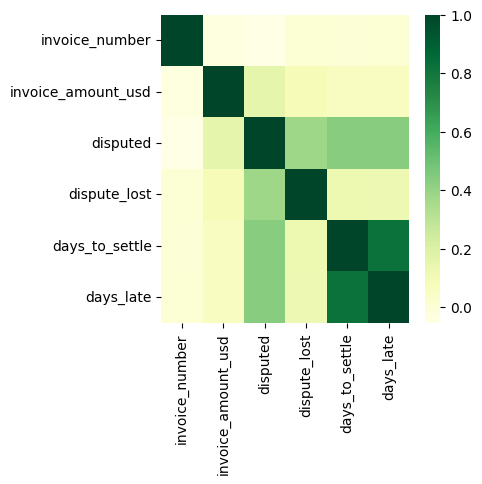

In [9]:
# Correlation heat map of the features
plt.figure(figsize = (4, 4))
cormat = df[df.columns.to_list()].corr(numeric_only = True)
sns.heatmap(cormat, cmap='YlGn')
plt.show()

In [10]:
# Print the most correlated features to the target variable and sort
correlation_array = df.corr(numeric_only = True)['dispute_lost']
correlation_array.abs().sort_values(ascending = False)[1:]

disputed              0.376471
days_to_settle        0.127431
days_late             0.120148
invoice_amount_usd    0.085340
invoice_number        0.003289
Name: dispute_lost, dtype: float64

We turn our focus on the categorical features, by getting the distributions by country and customer ID.

In [11]:
# Create dataframe for disputed invoices
disputed_data = df[df['disputed'] == True]

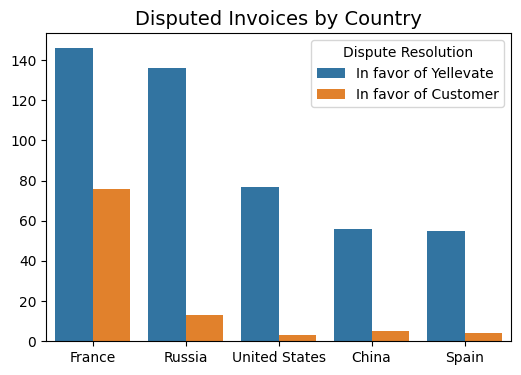

In [12]:
# Visualize the number of disputed invoices by country
plt.figure(figsize = (6, 4))
sns.countplot(x='country', data=disputed_data, hue='dispute_lost')
plt.title('Disputed Invoices by Country', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.legend(
    title='Dispute Resolution',
    loc='upper right',
    labels=[
        'In favor of Yellevate',
        'In favor of Customer'
    ]
)
plt.show()

Given the number of invoice disputes, France is at the top, particularly in the count of disputes that were lost or in favor of the customer. It is glaringly high as compared to the other countries.

In [13]:
# Summarize the revenue loss due to lost disputes
disputed_lost_amount = disputed_data.query('dispute_lost == True').groupby(['country'])['invoice_amount_usd'].sum().reset_index()
disputed_lost_amount = disputed_lost_amount.sort_values(by='invoice_amount_usd', ascending=False)
disputed_lost_amount.style.hide(axis='index')

country,invoice_amount_usd
France,526264
Russia,81291
China,42630
United States,22936
Spain,17046


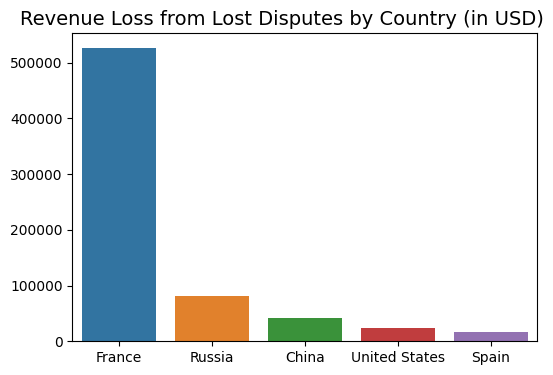

In [14]:
# Visualize the revenue loss by country due to lost disputes
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    x='country',
    y='invoice_amount_usd',
    data=disputed_lost_amount,
    ax=ax
)

ax.set_title(
    "Revenue Loss from Lost Disputes by Country (in USD)",
    fontsize=14,
    x=0.45
)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

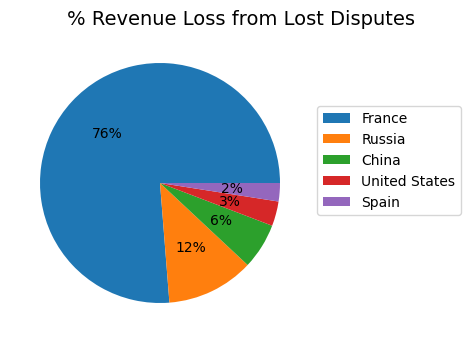

In [15]:
# Visualize the revenue loss percentages by country due to lost disputes
fig, ax = plt.subplots(figsize=(4, 4))
pie = plt.pie(
    disputed_lost_amount['invoice_amount_usd'],
    autopct='%.0f%%',
    textprops={'fontsize': 10}
)
plt.legend(
    pie[0],
    disputed_lost_amount['country'],
    bbox_to_anchor=(0.75, 0.7),
    fontsize=10, 
    bbox_transform=plt.gcf().transFigure,
    prop={'size': 10}
)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.75)
ax.set_title(
    "% Revenue Loss from Lost Disputes",
    fontsize=14,
    x=0.77
)
plt.show()

It can be seen that France due to having a high number of invoice disputes that were lost, has also the highest revenue loss.

We go deeper with the analysis by investigating at customer level.

In [16]:
# Dataframe to summarize disputed invoices that were lost
grouping_columns = ['customer_ID', 'country']
disputed_lost_count = df.query('dispute_lost == True').groupby(grouping_columns)['invoice_number'].count().reset_index()
disputed_lost_count = disputed_lost_count.rename(columns={'invoice_number': 'lost'})

In [17]:
# Dataframe to summarize disputed invoices that were won
disputed_won_count = df.query('disputed == True & dispute_lost == False').groupby(grouping_columns)['invoice_number'].count().reset_index()
disputed_won_count = disputed_won_count.rename(columns={'invoice_number': 'won'})

In [18]:
# Dataframe to summarize non-disputed invoices
accepted_count = df.query('disputed == False').groupby(grouping_columns)['invoice_number'].count().reset_index()
accepted_count = accepted_count.rename(columns={'invoice_number': 'not_disputed'})

In [19]:
# Merge the 3 dataframes
summary_counts = disputed_lost_count.merge(
    accepted_count,
    how='left',
    on=grouping_columns
).merge(
    disputed_won_count,
    how='left',
    on=grouping_columns
)

summary_columns = ['lost', 'not_disputed', 'won']
summary_counts[summary_columns] = summary_counts[summary_columns].astype('Int64').fillna(0)

summary_counts.sort_values(by=['lost'], ascending=False, inplace=True)
summary_counts.head(10)

,customer_ID,country,lost,not_disputed,won
7,3448-OWJOT,France,12,1,15
31,9725-EZTEJ,France,11,2,13
11,4632-QZOKX,France,8,0,9
32,9771-QTLGZ,France,8,1,13
25,7600-OISKG,France,8,1,14
28,8389-TCXFQ,France,6,16,11
12,4640-FGEJI,France,5,24,6
17,5613-UHVMG,Russia,4,8,10
30,9117-LYRCE,France,4,14,5
10,4092-ZAVRG,France,3,16,2


We can see that 9 out of 10 customers with high number of lost disputes are from France, 5 of which interestingly have very low count of non-disputed invoices (less than 3), suggesting that majority of their invoices were disputed. We can concur that there could be an over-utilization of the dispute policy.

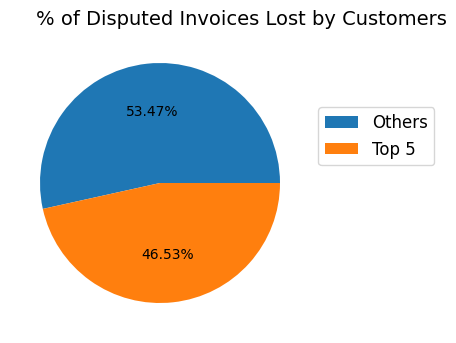

In [20]:
# Get the percentage of invoice disputes lost coming from the top 5 customers
top_dispute = summary_counts.head()['customer_ID']
summary_counts.loc[:, 'is_top5'] = summary_counts['customer_ID'].isin(top_dispute.to_list())
problematic_counts = summary_counts.groupby(['is_top5'])['lost'].sum().reset_index()

fig, ax = plt.subplots(figsize=(4, 4))
pie = plt.pie(
    problematic_counts['lost'],
    autopct='%.2f%%',
    textprops={'fontsize': 10}
)
legend = plt.legend(
    pie[0],
    ['Others', 'Top 5'],
    bbox_to_anchor=(0.75, 0.7),
    fontsize=10, 
    bbox_transform=plt.gcf().transFigure,
    prop={'size': 12}
)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.75)
ax.set_title(
    "% of Disputed Invoices Lost by Customers",
    fontsize=14,
    x=0.77
)
plt.show()

The 5 customers from the previous tally, all coming from France, contributes to almost half of the total number of disputed invoices that were lost.

### Recommendations

Based from the insights provided, it is recommended:
1. To increase the company's protection against over utilization of dispute facility
2. To decrease the chances of dispute facility over-use by enforcing a strict adherence to penalties for abusive dispute filing